# Lab5 - Introduction to Deep Neural Network
- Jinna Wannasopa 64070501060

Name your file to 1060.ipynb

## Lab Instruction

In this lab, you will learn how to build a simple fully-connected neural network with Keras and Tensorflow as the backend. We will experiment with MNIST data, which is a Keras built-in dataset.

There are three questions to answer in this lab.

See http://yann.lecun.com/exdb/mnist/ for data description.

First, import all of the libraries that will be used in this lab.

In [1]:
import keras
import numpy as np

In [2]:
from keras.datasets import mnist

### Load Data ###
data = mnist.load_data()
#################

### 1. Learn About the Data

Understand your data, such as its shape, format, datatype, structure, distribution, data classes, and so on.

Training data - images shape: (60000, 28, 28)
Training data - labels shape: (60000,)
Testing data - images shape: (10000, 28, 28)
Testing data - labels shape: (10000,)
Data type of images: uint8
Data type of labels: uint8
Classes: [0 1 2 3 4 5 6 7 8 9]
Counts: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


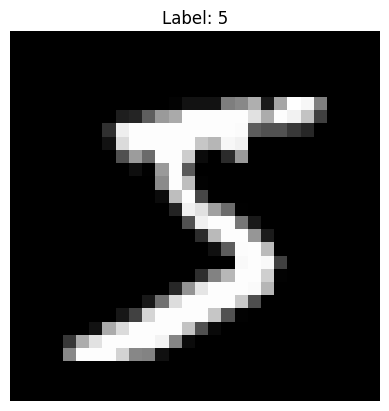

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = data

# Display information about the dataset
print("Training data - images shape:", x_train.shape)
print("Training data - labels shape:", y_train.shape)
print("Testing data - images shape:", x_test.shape)
print("Testing data - labels shape:", y_test.shape)

# Check the data type and structure
print("Data type of images:", x_train.dtype)
print("Data type of labels:", y_train.dtype)

# Analyze distribution of classes
unique_classes, counts = np.unique(y_train, return_counts=True)
print("Classes:", unique_classes)
print("Counts:", counts)

# Visualize a sample image and its label
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


### 2. Build Neural Network Model

Build a two-layer neural network (except for the input and output layers) using `Sequential()`
( See https://keras.io/models/sequential )
> INPUT -> LINEAR -> RELU -> LINEAR -> SOFTMAX

with the hidden layer of size 512.

See Keras Model: https://keras.io/models/about-keras-models/

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
  # Input Layer
  Dense(512, activation='linear', input_shape=(28*28,)),
  # First hidden layer with linear activation
  Dense(512, activation='relu'),
  # Second hidden layer with ReLU activation
  Dense(512, activation="linear"),
  # Output layer with softmax activation for classification
  Dense(10, activation='softmax')
])

Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [5]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Let's see how our model looks using `.summary()`

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Preprocessing

- Reshape (flatten) the features data and normalize the value to be between 0 and 1
- One-hot the target data

In [7]:
from tensorflow.keras.utils import to_categorical

# Reshape and normalize input features
X_train = x_train.reshape(-1, 28*28)
X_train = X_train.astype('float32') / 255.0

X_test = x_test.reshape(-1, 28*28)
X_test = X_test.astype('float32') / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 4. Model Training

Use `.fit()` to train your neural network model and return a record of accuracy and loss values for each epoch.

We will train the model for 10 epochs (If you are confident in your computer's performance, you can train the model with more epochs.)

We will train using the mini-batch method, with each batch containing 128 data points.

To avoid overfitting with the test set, we will split the current training data into 90% for training and 10% for validating the model.

This will take approximately one minute.

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 [==============================] - 20s 43ms/step - loss: 0.7876 - accuracy: 0.8101 - val_loss: 0.3559 - val_accuracy: 0.9105
Epoch 2/10
422/422 [==============================] - 17s 40ms/step - loss: 0.3770 - accuracy: 0.8957 - val_loss: 0.2786 - val_accuracy: 0.9267
Epoch 3/10
422/422 [==============================] - 9s 21ms/step - loss: 0.3205 - accuracy: 0.9091 - val_loss: 0.2458 - val_accuracy: 0.9323
Epoch 4/10
422/422 [==============================] - 11s 27ms/step - loss: 0.2882 - accuracy: 0.9175 - val_loss: 0.2263 - val_accuracy: 0.9375
Epoch 5/10
422/422 [==============================] - 15s 35ms/step - loss: 0.2642 - accuracy: 0.9253 - val_loss: 0.2068 - val_accuracy: 0.9433
Epoch 6/10
422/422 [==============================] - 10s 23ms/step - loss: 0.2442 - accuracy: 0.9308 - val_loss: 0.1948 - val_accuracy: 0.9438
Epoch 7/10
422/422 [==============================] - 8s 18ms/step - loss: 0.2269 - accuracy: 0.9356 - val_loss: 0.1839 - val_accuracy: 0

We will plot the loss and accuracy of both the train and validate sets over iterations.

In [9]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [10]:
# The function argument is the model's history during the training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

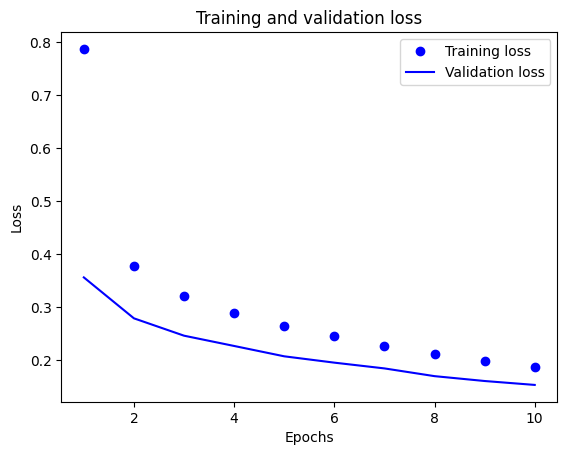

In [11]:
plot_loss_fn(history)

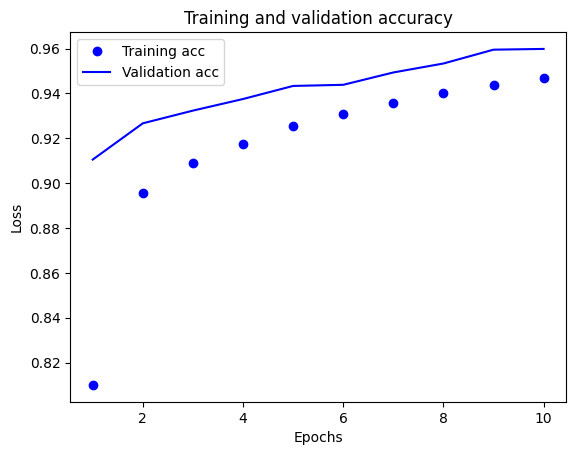

In [12]:
plot_acc_fn(history)

Q: At which iteration does your model start to overfit? Give your rational.

**ANSWER**

I think the model did not seem to overfit yet, given 10 epochs.

### 5. Model Evaluation

Evaluate your model with test set using `.evaluate()` and compare the results to those from the training and validate sets. Does your model overfit or underfit? How about the bias and variance?

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1749 - accuracy: 0.9491


[0.17491231858730316, 0.9491000175476074]

Q: Analyze the performance of your model using a confusion matrix. Which class does your model frequently misclassify? What is the precision and recall of your model?

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

### evaluate your model ###
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))
###########################

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.95      0.94      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.93      0.94       892
           6       0.94      0.97      0.95       958
           7       0.94      0.95      0.95      1028
           8       0.93      0.93      0.93       974
           9       0.95      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000




**ANSWER**

- Class 8 (digit '8') is frequently misclassified, with a slightly lower precision and recall compared to other classes.
- Precision and recall scores range between 0.92 and 0.98 for different classes, with an average of 0.95 for both metrics.

### 6. Model tuning

Try tuning your model by:
1. Adjust the learning rate of your optimizer by increasing and decreasing the learning rate to see how it affects your model.
2. Experiment with different optimizers ('sgd', 'rmspop', 'adagrad', 'adam', See https://keras.io/optimizers ) to see which one converges faster.
3. Change the structure of your model by adding more hidden layers with any number of nodes, and then observe how this affects your model.

In [21]:
# Just for test different parameters (Faster)
new_model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(10, activation='softmax')
])

(x_train, y_train), (x_test, y_test) = data

# Reshape and normalize input features
X_train = x_train.reshape(-1, 28*28)
X_train = X_train.astype('float32') / 255.0

X_test = x_test.reshape(-1, 28*28)
X_test = X_test.astype('float32') / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
from tensorflow.keras import optimizers

# Define the optimizer outside the loop
sgd = optimizers.SGD()

# Compile the model
new_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Constant validation split if applicable
validation_data = (X_train, y_train)  # Replace with your validation split if it's constant

# Experimenting with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]  # Try different learning rates

for lr in learning_rates:
    sgd.learning_rate = lr  # Change learning rate in the optimizer
    history = new_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=validation_data, verbose=0)
    evaluation = new_model.evaluate(X_test, y_test)
    print(f"Learning Rate: {lr} - Test Accuracy: {evaluation[1]}, Test Loss: {evaluation[0]}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9709
Learning Rate: 0.1 - Test Accuracy: 0.9708999991416931, Test Loss: 0.09877271205186844
313/313 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9731
Learning Rate: 0.01 - Test Accuracy: 0.9731000065803528, Test Loss: 0.09337177127599716
313/313 [==============================] - 1s 3ms/step - loss: 0.0925 - accuracy: 0.9734
Learning Rate: 0.001 - Test Accuracy: 0.9733999967575073, Test Loss: 0.09254913032054901
313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9734
Learning Rate: 0.0001 - Test Accuracy: 0.9733999967575073, Test Loss: 0.09249457716941833


In [23]:
from tensorflow.keras import optimizers

# Compile the model outside the loop
new_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Constant validation split if applicable
validation_data = (X_train, y_train)  # Replace with your validation split if it's constant

# Experimenting with different optimizers
optimizers_list = ['sgd', 'rmsprop', 'adagrad', 'adam']  # Try different optimizers

for optimizer_name in optimizers_list:
    optimizer = optimizers.get(optimizer_name)
    new_model.optimizer = optimizer  # Set the optimizer directly in the new_model

    history = new_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=validation_data, verbose=0)
    evaluation = new_model.evaluate(X_test, y_test)
    print(f"Optimizer: {optimizer_name} - Test Accuracy: {evaluation[1]}, Test Loss: {evaluation[0]}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.9748
Optimizer: sgd - Test Accuracy: 0.9747999906539917, Test Loss: 0.08883687853813171
313/313 [==============================] - 1s 3ms/step - loss: 0.0863 - accuracy: 0.9756
Optimizer: rmsprop - Test Accuracy: 0.975600004196167, Test Loss: 0.08633727580308914
313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9757
Optimizer: adagrad - Test Accuracy: 0.9757000207901001, Test Loss: 0.08366146683692932
313/313 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9763
Optimizer: adam - Test Accuracy: 0.9763000011444092, Test Loss: 0.08120168745517731


In [24]:
# Changing model structure by adding more hidden layers
model = Sequential([
    Dense(512, activation='linear', input_shape=(28*28,)),
    Dense(512, activation='relu'),
    Dense(512, activation="relu"),  # Adding another hidden layer
    Dense(256, activation='relu'),  # Adding a layer with a different number of nodes
    Dense(10, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 [==============================] - 14s 33ms/step - loss: 1.0342 - accuracy: 0.7494 - val_loss: 0.3790 - val_accuracy: 0.9040
Epoch 2/10
422/422 [==============================] - 10s 24ms/step - loss: 0.3805 - accuracy: 0.8941 - val_loss: 0.2704 - val_accuracy: 0.9243
Epoch 3/10
422/422 [==============================] - 10s 23ms/step - loss: 0.3070 - accuracy: 0.9127 - val_loss: 0.2312 - val_accuracy: 0.9353
Epoch 4/10
422/422 [==============================] - 10s 24ms/step - loss: 0.2698 - accuracy: 0.9230 - val_loss: 0.2083 - val_accuracy: 0.9417
Epoch 5/10
422/422 [==============================] - 10s 23ms/step - loss: 0.2430 - accuracy: 0.9308 - val_loss: 0.1951 - val_accuracy: 0.9443
Epoch 6/10
422/422 [==============================] - 8s 19ms/step - loss: 0.2215 - accuracy: 0.9366 - val_loss: 0.1753 - val_accuracy: 0.9518
Epoch 7/10
422/422 [==============================] - 10s 23ms/step - loss: 0.2042 - accuracy: 0.9410 - val_loss: 0.1661 - val_accuracy: 

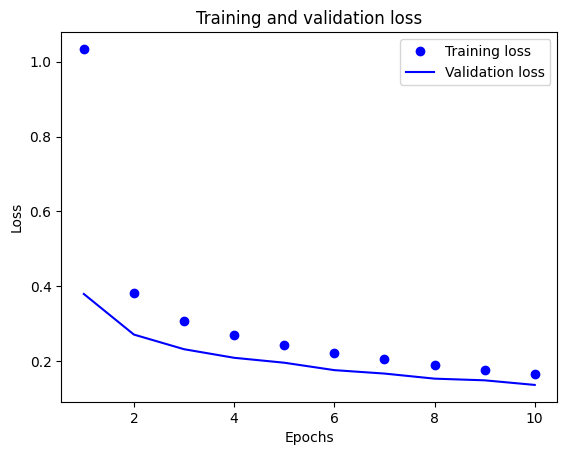

In [25]:
plot_loss_fn(history)

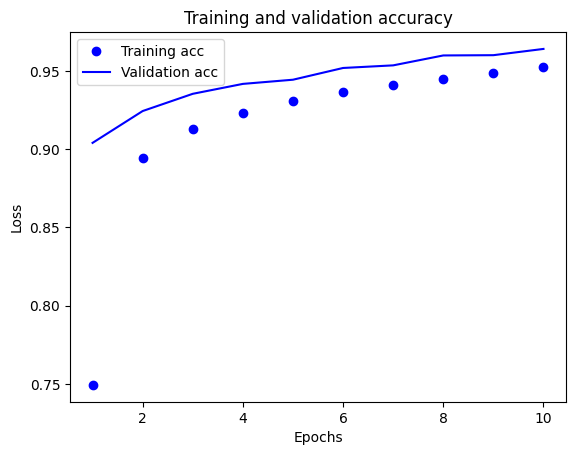

In [26]:
plot_acc_fn(history)

### 7. Discussion and Result
Q: Write down your findings from the previous step.

**ANSWER**

**Note:** I removed all the layers in the previous model to make it run faster for each parameter that I adjusted or changed.
1. Adjust the learning rate (SGD)
- The result after trying different learning rates shows that the increase in learning rate makes the model accuracy increase but the model seems to overfit though.
2. Experiment with different optimizers (sgd, rmsprop, adagrad, adam)
- The result shows that the best accuracy optimizer arranged from best to worst is adam, adagrad, rmsprop and sgd. Although the model seems to overfit.
3. Change the structure of your model
- At the 8th epoch, the validation accuracy plateaus while the training accuracy continues to rise. Additionally, the validation loss appears to stabilize or decrease initially, but in later epochs, it starts to increase slightly. This divergence suggests the onset of overfitting.